In [1]:
# This code run the Welch ANOVA investigating differences between the 3 groups at baseline
# (more specifically the difference between the intervention and active groups, or between the control and active groups),
# except for PA parameters (Table 2).
# It also tests the distribution of data

In [2]:
##############################
import pandas as pd
pd.__version__
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import pingouin as pg
from pingouin import pairwise_ttests, read_dataset
from pingouin import corr
##############################
# For diplaying on 90% of your screen widths
from IPython.core.display import display, HTML
display(HTML(
    '<style>'
        '#notebook { padding-top:0px !important; } ' 
        '.container { width:90% !important; } '
        '.end_space { min-height:0px !important; } '
    '</style>'
))

C:\Users\BMELAB\Anaconda3\lib\site-packages\distributed\utils.py:134: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [WinError 10051] A socket operation was attempted to an unreachable network
  % (host, default, e), RuntimeWarning)


## Settings

In [3]:
##################################
# Period of exploration
period = ['0']
##################################
# Type of analysis
# intent-to-treat?
ITT = False
##################################
# all groups or intervention vs. control only?
all_groups = True

In [4]:
all_param=[ 'energy_intakes','proteins','fat','carb',
           'weight', 'BMI','waist_circumference','HR','bMAP', 'baPWV',
           'glucose','HbA1c','TG_(neutral fat)','tot_cholesterol',
           'trunk_flex','vertical_jump','VO2max_w'  
          ]

###### Build the path and load data

In [5]:
# path
path = 'C:\\Users\\  \\' #Enter your path
print(path)
data_set = []
data_set.append(pd.read_csv(path+'data_year_0S.csv',index_col=0))
data_set.append(pd.read_csv(path+'data_year_1S.csv',index_col=0))
data_set.append(pd.read_csv(path+'data_year_2S.csv',index_col=0))
print('number of data in year 0 :', data_set[0].shape[0])
print('number of data in year 1 :', data_set[1].shape[0])
print('number of data in year 2 :', data_set[2].shape[0])

C:\Users\BMELAB\Desktop\JUXIS Code\
number of data in year 0 : 574
number of data in year 1 : 512
number of data in year 2 : 469


### Functions for the main ANOVA

In [6]:
def GeneralStats():
    stats_intervention.append(np.mean(da[da['group'] == 'intervention'][of_int]))
    stats_intervention.append(np.std(da[da['group'] == 'intervention'][of_int]))
    stats_intervention.append(len(da[da['group'] == 'intervention'][of_int].dropna()))
    #
    stats_year.append(stats_intervention)
    stats_control.append(np.mean(da[da['group'] == 'control'][of_int]))
    stats_control.append(np.std(da[da['group'] == 'control'][of_int]))
    stats_control.append(len(da[da['group'] == 'control'][of_int].dropna()))    
    #
    stats_year.append(stats_control)
    stats_active.append(np.mean(da[da['group'] == 'active'][of_int]))
    stats_active.append(np.std(da[da['group'] == 'active'][of_int]))
    stats_active.append(len(da[da['group'] == 'active'][of_int].dropna()))
    #
    stats_year.append(stats_active)

    return(stats_year)

In [7]:
def AnovaPlot():    
    plt.figure()
    
    %matplotlib inline
    fig = plt.figure()
    sns.set(context='notebook', style='whitegrid', palette='deep', font_scale=1, color_codes=True, rc={'figure.figsize':(11.7,8.27)})
    ax = sns.boxplot(x = 'period', y=of_int, hue='group', palette="Set3", data=daaa,
             linewidth=3, showfliers=False,  hue_order= ['intervention','control','active'])
    ax.set_xticklabels(['baseline', '+1-year', '+2-year'], fontsize=12)
    ax.set_title(of_int+' (boxplots)', fontsize=12)
    
    #
    plt.show()


    

In [8]:
def AnovaStats(daaa, group):
    if group == True:
        daaa=daaa
    else:
        daaa=daaa[daaa.group != 'active']
    aov = pg.welch_anova(dv=of_int, between='group', data=daaa)
    # Pretty printing of ANOVA summary
    print(of_int,', ANOVA, all_groups =', all_groups, ', ITT =', ITT,  ' :')
    display(aov)
    if aov['p-unc'].loc[0]<0.05:
        print('SIGNIFICANT')
        posthoc = pg.pairwise_tukey(data=daaa, dv=of_int, between='group')
        #
        display(posthoc)
    else:
        print('no effect')
    return(aov)

# ANOVA
<p> 3 groups at baseline only
</p>

energy_intakes , ANOVA, BL, all_groups = True , ITT = False  :


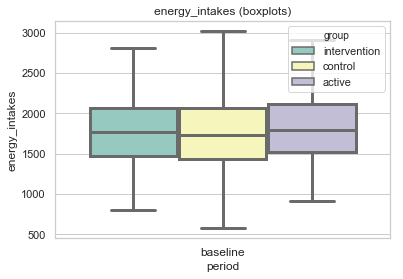

,mean,SD,N,year
intervention,1775.373101,448.526543,183,0
control,1786.721571,488.397843,161,0
active,1854.493808,510.529875,230,0


general statistics for energy_intakes

---------------------------
energy_intakes , ANOVA, all_groups = True , ITT = False  :


,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,365.789643,1.578365,0.207714,0.005606


no effect
 
 
proteins , ANOVA, BL, all_groups = True , ITT = False  :


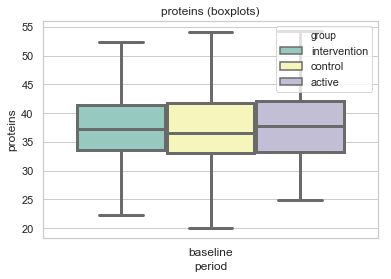

,mean,SD,N,year
intervention,37.351267,6.358850,183,0
control,37.014297,6.334614,161,0
active,37.942867,6.563822,230,0


general statistics for proteins

---------------------------
proteins , ANOVA, all_groups = True , ITT = False  :


,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,364.921996,1.037145,0.355508,0.003652


no effect
 
 
fat , ANOVA, BL, all_groups = True , ITT = False  :


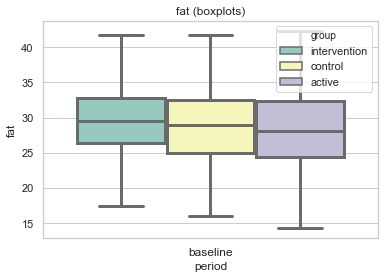

,mean,SD,N,year
intervention,29.071395,5.829985,183,0
control,28.470731,5.815402,161,0
active,28.298891,5.362038,230,0


general statistics for fat

---------------------------
fat , ANOVA, all_groups = True , ITT = False  :


,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,356.288912,0.987165,0.373648,0.003499


no effect
 
 
carb , ANOVA, BL, all_groups = True , ITT = False  :


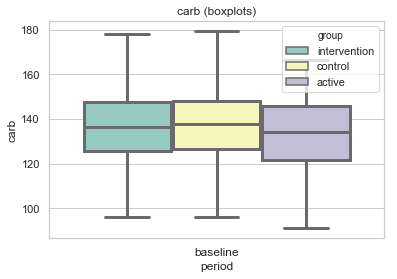

,mean,SD,N,year
intervention,136.441608,18.742128,183,0
control,137.695881,17.435269,161,0
active,133.451455,16.750961,230,0


general statistics for carb

---------------------------
carb , ANOVA, all_groups = True , ITT = False  :


,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,357.912868,3.20492,0.041729,0.010568


SIGNIFICANT


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,active,control,133.451455,137.695881,-4.244425,1.813057,-2.341032,0.050498,-0.240093
1,active,intervention,133.451455,136.441608,-2.990153,1.747775,-1.710834,0.201439,-0.169161
2,control,intervention,137.695881,136.441608,1.254272,1.906517,0.657887,0.820115,0.070931


 
 
weight , ANOVA, BL, all_groups = True , ITT = False  :


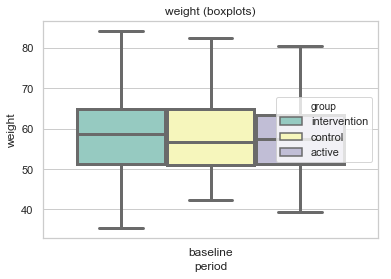

,mean,SD,N,year
intervention,59.251093,10.394186,183,0
control,58.348137,9.285385,161,0
active,58.121348,9.622932,230,0


general statistics for weight

---------------------------
weight , ANOVA, all_groups = True , ITT = False  :


,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,362.884462,0.672433,0.5111,0.002519


no effect
 
 
BMI , ANOVA, BL, all_groups = True , ITT = False  :


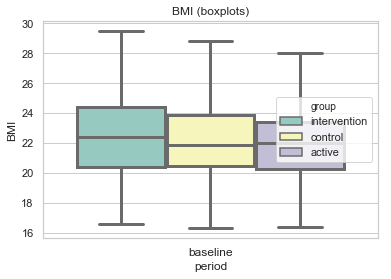

,mean,SD,N,year
intervention,22.645355,3.178250,183,0
control,22.198137,2.623507,161,0
active,22.207826,2.593911,230,0


general statistics for BMI

---------------------------
BMI , ANOVA, all_groups = True , ITT = False  :


,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,356.616722,1.333752,0.264798,0.005368


no effect
 
 
waist_circumference , ANOVA, BL, all_groups = True , ITT = False  :


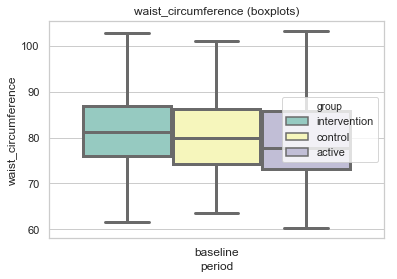

,mean,SD,N,year
intervention,82.059016,8.830116,183,0
control,80.277019,8.010657,161,0
active,79.352609,8.628950,230,0


general statistics for waist_circumference

---------------------------
waist_circumference , ANOVA, all_groups = True , ITT = False  :


,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,365.997975,4.901641,0.00793,0.017778


SIGNIFICANT


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,active,control,79.352609,80.277019,-0.924410,0.878406,-1.052372,0.605739,-0.107930
1,active,intervention,79.352609,82.059016,-2.706408,0.846777,-3.196127,0.004013,-0.316021
2,control,intervention,80.277019,82.059016,-1.781998,0.923686,-1.929225,0.130636,-0.208003


 
 
HR , ANOVA, BL, all_groups = True , ITT = False  :


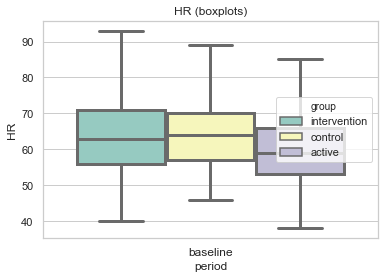

,mean,SD,N,year
intervention,65.120219,12.858489,183,0
control,64.981366,10.220228,161,0
active,60.804348,11.158969,230,0


general statistics for HR

---------------------------
HR , ANOVA, all_groups = True , ITT = False  :


,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,363.440854,9.697866,0.000079,0.03187


SIGNIFICANT


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,active,control,60.804348,64.981366,-4.177019,1.183268,-3.530071,0.00122,-0.362040
1,active,intervention,60.804348,65.120219,-4.315871,1.140662,-3.783654,0.00100,-0.374113
2,control,intervention,64.981366,65.120219,-0.138852,1.244263,-0.111594,0.90000,-0.012032


 
 
bMAP , ANOVA, BL, all_groups = True , ITT = False  :


C:\Users\BMELAB\Anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedCheckFailedWarning: Failed to check for latest version of package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


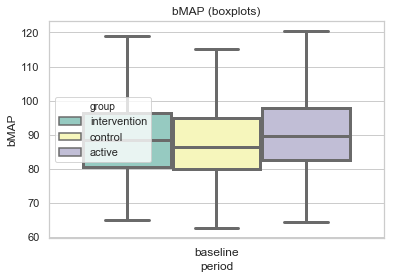

,mean,SD,N,year
intervention,89.428962,12.424873,183,0
control,87.521739,10.934353,161,0
active,90.482609,11.917001,230,0


general statistics for bMAP

---------------------------
bMAP , ANOVA, all_groups = True , ITT = False  :


,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,366.138587,3.234952,0.04049,0.010293


SIGNIFICANT


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,active,control,90.482609,87.521739,2.960870,1.217537,2.431851,0.039987,0.249408
1,active,intervention,90.482609,89.428962,1.053647,1.173698,0.897716,0.712640,0.088763
2,control,intervention,87.521739,89.428962,-1.907223,1.280299,-1.489669,0.296485,-0.160611


 
 
baPWV , ANOVA, BL, all_groups = True , ITT = False  :


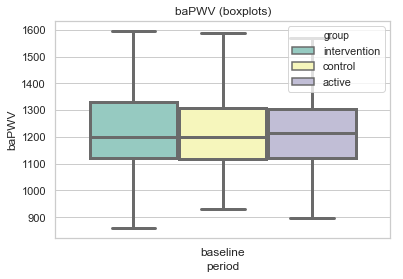

,mean,SD,N,year
intervention,1235.836066,184.996841,183,0
control,1229.189441,157.303125,161,0
active,1228.006522,143.654942,230,0


general statistics for baPWV

---------------------------
baPWV , ANOVA, all_groups = True , ITT = False  :


,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,350.316465,0.114224,0.892091,0.000457


no effect
 
 
glucose , ANOVA, BL, all_groups = True , ITT = False  :


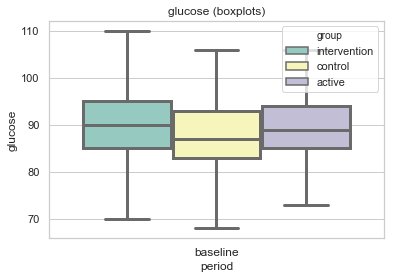

,mean,SD,N,year
intervention,89.961749,8.357037,183,0
control,88.322981,9.529035,161,0
active,89.986957,8.204707,230,0


general statistics for glucose

---------------------------
glucose , ANOVA, all_groups = True , ITT = False  :


,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,353.496726,1.858453,0.157434,0.007327


no effect
 
 
HbA1c , ANOVA, BL, all_groups = True , ITT = False  :


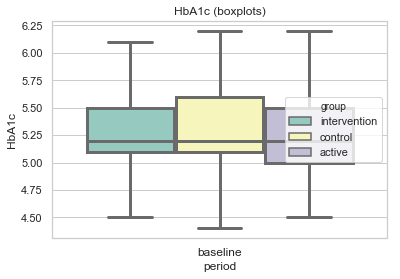

,mean,SD,N,year
intervention,5.304372,0.323205,183,0
control,5.303727,0.330422,161,0
active,5.286522,0.337434,230,0


general statistics for HbA1c

---------------------------
HbA1c , ANOVA, all_groups = True , ITT = False  :


,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,364.258373,0.190301,0.826793,0.000675


no effect
 
 
TG_(neutral fat) , ANOVA, BL, all_groups = True , ITT = False  :


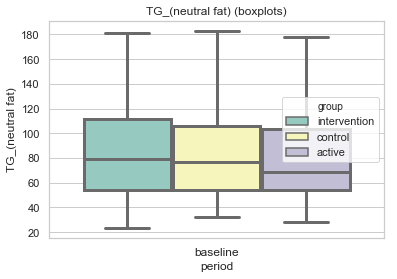

,mean,SD,N,year
intervention,89.759563,48.908715,183,0
control,90.484472,60.239285,161,0
active,83.604348,45.484493,230,0


general statistics for TG_(neutral fat)

---------------------------
TG_(neutral fat) , ANOVA, all_groups = True , ITT = False  :


,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,344.368536,1.192892,0.304593,0.003896


no effect
 
 
tot_cholesterol , ANOVA, BL, all_groups = True , ITT = False  :


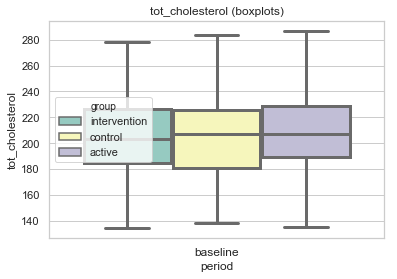

,mean,SD,N,year
intervention,208.125683,33.423766,183,0
control,207.012422,36.425366,161,0
active,210.500000,32.942737,230,0


general statistics for tot_cholesterol

---------------------------
tot_cholesterol , ANOVA, all_groups = True , ITT = False  :


,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,356.538675,0.532509,0.587596,0.001886


no effect
 
 
trunk_flex , ANOVA, BL, all_groups = True , ITT = False  :


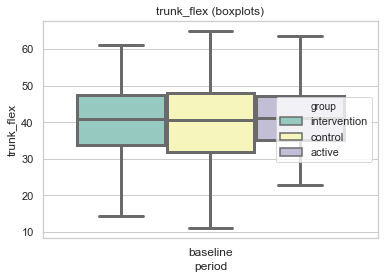

,mean,SD,N,year
intervention,39.663462,10.114438,182,0
control,39.942236,11.375102,161,0
active,41.104367,8.142186,229,0


general statistics for trunk_flex

---------------------------
trunk_flex , ANOVA, all_groups = True , ITT = False  :


,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,335.697854,1.436006,0.239333,0.004416


no effect
 
 
vertical_jump , ANOVA, BL, all_groups = True , ITT = False  :


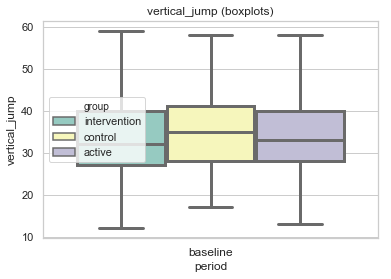

,mean,SD,N,year
intervention,33.887006,9.505199,177,0
control,35.408805,9.555014,159,0
active,35.339286,9.976359,224,0


general statistics for vertical_jump

---------------------------
vertical_jump , ANOVA, all_groups = True , ITT = False  :


,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,357.528377,1.436002,0.239245,0.005013


no effect
 
 
VO2max_w , ANOVA, BL, all_groups = True , ITT = False  :


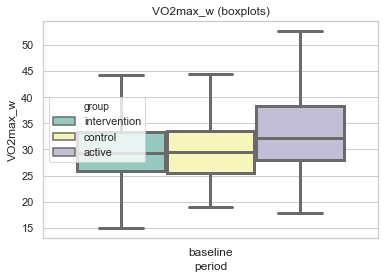

,mean,SD,N,year
intervention,29.825989,6.447125,177,0
control,29.979355,6.158673,155,0
active,33.318018,7.164027,222,0


general statistics for VO2max_w

---------------------------
VO2max_w , ANOVA, all_groups = True , ITT = False  :


,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,358.01575,16.540883,1.346338e-07,0.059508


SIGNIFICANT


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,active,control,33.318018,29.979355,3.338663,0.699816,4.770775,0.001,0.498365
1,active,intervention,33.318018,29.825989,3.492029,0.673719,5.183215,0.001,0.521316
2,control,intervention,29.979355,29.825989,0.153366,0.735482,0.208525,0.900,0.022887


In [9]:
for of_int in all_param:
    print(of_int,', ANOVA, BL, all_groups =', all_groups, ', ITT =', ITT,  ' :')
    #
    daa = []
    stats = []
    # Build a base
    for year in range(len(period)):
        da = []
        stats_intervention = []
        stats_control = []
        stats_active = []
        stats_year = []
        if year == 0:
            da = []
            da = data_set[year][['subject_ID','group','period',of_int]].dropna()
        else:   
            if ITT == False:
                da = pd.merge(data_set[0][['subject_ID','group']].dropna(),data_set[year][['subject_ID','period',of_int]].dropna(), how='inner', left_on='subject_ID', right_on='subject_ID' )
            if ITT == True:
                da = pd.merge(data_set[0][['subject_ID','group']].dropna(),data_set[year][['subject_ID','period',of_int]], how='left', left_on='subject_ID', right_on='subject_ID' )    
                da[of_int]=da[of_int].fillna(daa[0][of_int])
        daa.append(da)

        # stats
        GeneralStats()
        stats_year= pd.DataFrame(stats_year,
                 index=['intervention','control','active'],
                 columns=['mean','SD','N'])
        stats_year['year']=year
        stats.append(stats_year)
    stats=pd.concat(stats)


    daaa=pd.concat(daa)
    AnovaPlot()
    display(stats)
    print('general statistics for', of_int)
    print('')
    print('---------------------------')
    AnovaStats(daaa,group=all_groups)
    print(' ')
    print(' ')






In [10]:
print('The whole ANOVA analysis has been successfully run')

The whole ANOVA analysis has been successfully run


## Function for testing distributions

In [11]:
def NormalityTest(param_for_main_analysis, period):
    for of_int in param_for_main_analysis:
        print(of_int, ' : ')
        for year in range(len(period)):
            norm_intervention = pg.normality(data_set[year][data_set[year]['group']=='intervention'][of_int])
            norm_control = pg.normality(data_set[year][data_set[year]['group']=='control'][of_int])
            norm_active = pg.normality(data_set[year][data_set[year]['group']=='active'][of_int])
            dis = {'intervention year '+str(year): norm_intervention.loc[of_int], 'control year '+str(year): norm_control.loc[of_int],'active year '+str(year): norm_active.loc[of_int]}
            distrib = pd.DataFrame(data=dis)

            plt.figure()
            %matplotlib inline
            fig, ax = plt.subplots(1, 3, sharey='row')
            # determine min and max for each year in order to plot all graph on the same x axis.
            min_for_dis = min(data_set[year][of_int])
            max_for_dis = max(data_set[year][of_int]) 
            #
            ax[0] = sns.distplot(data_set[year][data_set[year]['group']=='intervention'][of_int], ax=ax[0])
            ax[0].set_title('intervention', fontsize=14)
            ax[0].set_xlim([min_for_dis, max_for_dis])
            ax[1] = sns.distplot(data_set[year][data_set[year]['group']=='control'][of_int],ax=ax[1])
            ax[1].set_title('control', fontsize=14)
            ax[1].set_xlim([min_for_dis, max_for_dis])
            ax[2] = sns.distplot(data_set[year][data_set[year]['group']=='active'][of_int],ax=ax[2])
            ax[2].set_title('active', fontsize=14)
            ax[2].set_xlim([min_for_dis, max_for_dis])

            plt.show() # better to keep when looping.    
            display(distrib)
            print('Normality test for ', of_int, 'at year ', str(year))
            print('')
            print('---------------------------')
        print('')
        print('')

## Testing distributions

energy_intakes  : 


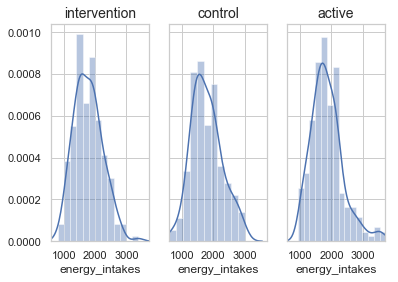

,intervention year 0,control year 0,active year 0
W,0.984691,0.982453,0.945739
pval,0.0431804,0.0389985,1.46122e-07
normal,False,False,False


Normality test for  energy_intakes at year  0

---------------------------


proteins  : 


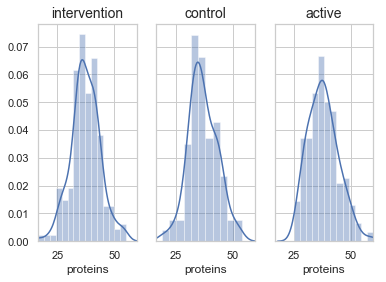

,intervention year 0,control year 0,active year 0
W,0.990853,0.988889,0.982016
pval,0.296187,0.234945,0.00508994
normal,True,True,False


Normality test for  proteins at year  0

---------------------------


fat  : 


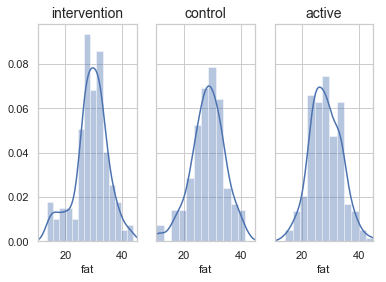

,intervention year 0,control year 0,active year 0
W,0.969056,0.984701,0.993946
pval,0.000439143,0.0734571,0.481366
normal,False,True,True


Normality test for  fat at year  0

---------------------------


carb  : 


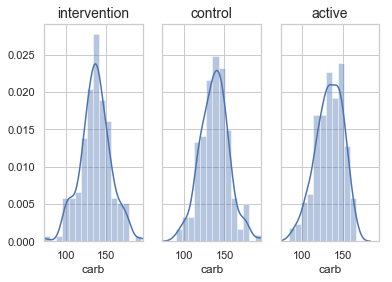

,intervention year 0,control year 0,active year 0
W,0.990074,0.993111,0.9819
pval,0.234958,0.642395,0.004876
normal,True,True,False


Normality test for  carb at year  0

---------------------------


weight  : 


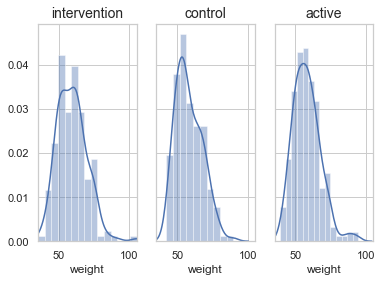

,intervention year 0,control year 0,active year 0
W,0.969264,0.964368,0.9634
pval,0.000464172,0.000370068,1.24315e-05
normal,False,False,False


Normality test for  weight at year  0

---------------------------


BMI  : 


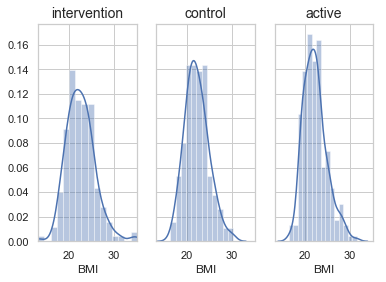

,intervention year 0,control year 0,active year 0
W,0.968612,0.985136,0.966502
pval,0.000390511,0.0830447,3.0253e-05
normal,False,True,False


Normality test for  BMI at year  0

---------------------------


waist_circumference  : 


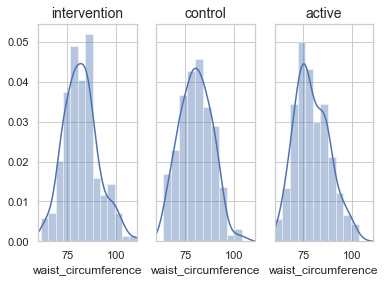

,intervention year 0,control year 0,active year 0
W,0.985936,0.989874,0.981468
pval,0.0641835,0.304544,0.00415555
normal,True,True,False


Normality test for  waist_circumference at year  0

---------------------------


HR  : 


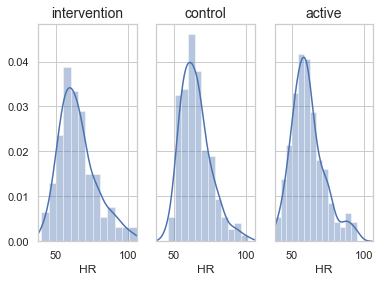

,intervention year 0,control year 0,active year 0
W,0.95383,0.953135,0.95759
pval,1.10102e-05,3.19713e-05,2.58968e-06
normal,False,False,False


Normality test for  HR at year  0

---------------------------


bMAP  : 


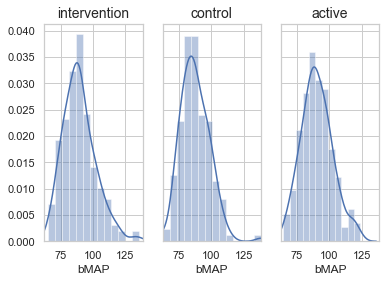

,intervention year 0,control year 0,active year 0
W,0.967729,0.967727,0.988289
pval,0.000309689,0.000819312,0.0575482
normal,False,False,True


Normality test for  bMAP at year  0

---------------------------


baPWV  : 


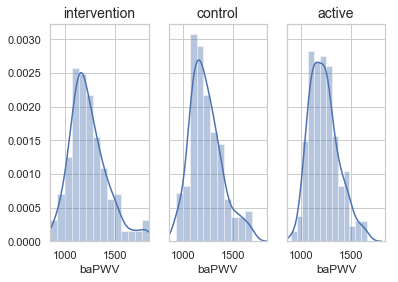

,intervention year 0,control year 0,active year 0
W,0.951148,0.960361,0.970774
pval,6.13569e-06,0.000149165,0.000110085
normal,False,False,False


Normality test for  baPWV at year  0

---------------------------


glucose  : 


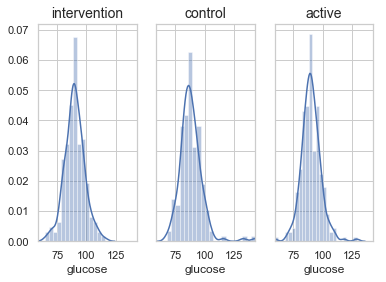

,intervention year 0,control year 0,active year 0
W,0.99039,0.880462,0.96696
pval,0.258356,4.4379e-10,3.46149e-05
normal,True,False,False


Normality test for  glucose at year  0

---------------------------


HbA1c  : 


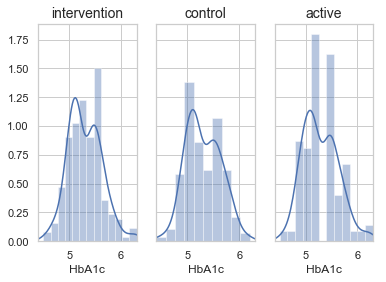

,intervention year 0,control year 0,active year 0
W,0.971714,0.974309,0.96836
pval,0.000900746,0.00426922,5.25388e-05
normal,False,False,False


Normality test for  HbA1c at year  0

---------------------------


TG_(neutral fat)  : 


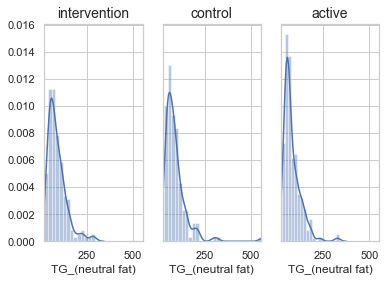

,intervention year 0,control year 0,active year 0
W,0.858171,0.700806,0.821137
pval,4.74715e-12,1.05178e-16,1.48513e-15
normal,False,False,False


Normality test for  TG_(neutral fat) at year  0

---------------------------


tot_cholesterol  : 


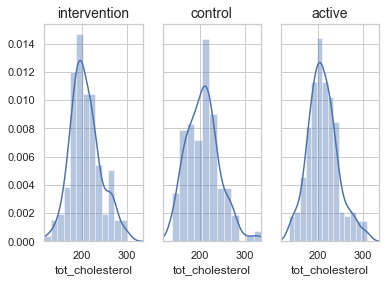

,intervention year 0,control year 0,active year 0
W,0.979471,0.974655,0.982189
pval,0.00849511,0.00467364,0.00543014
normal,False,False,False


Normality test for  tot_cholesterol at year  0

---------------------------


trunk_flex  : 


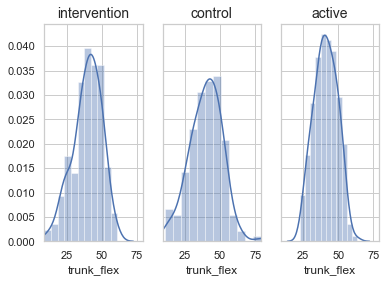

,intervention year 0,control year 0,active year 0
W,0.980443,0.990124,0.990637
pval,0.0117779,0.324746,0.147262
normal,False,True,True


Normality test for  trunk_flex at year  0

---------------------------


vertical_jump  : 


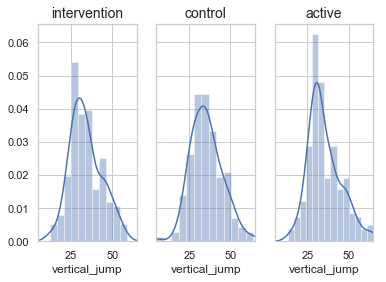

,intervention year 0,control year 0,active year 0
W,0.974695,0.982892,0.956999
pval,0.00259402,0.0465564,2.95123e-06
normal,False,False,False


Normality test for  vertical_jump at year  0

---------------------------


VO2max_w  : 


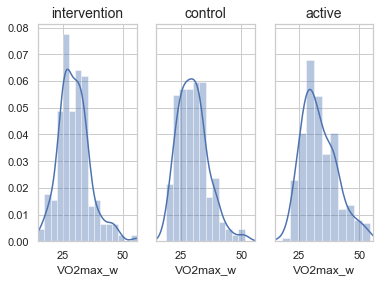

,intervention year 0,control year 0,active year 0
W,0.966623,0.963224,0.961574
pval,0.000303735,0.00038237,1.07145e-05
normal,False,False,False


Normality test for  VO2max_w at year  0

---------------------------




In [12]:
NormalityTest(param_for_main_analysis=all_param, period=period)